In [3]:
import wandb
import pandas as pd
import pandas_profiling

In [2]:
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

wandb: Currently logged in as: datamix-ai (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [4]:
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# List of all features + their type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

In [6]:
import seaborn as sns

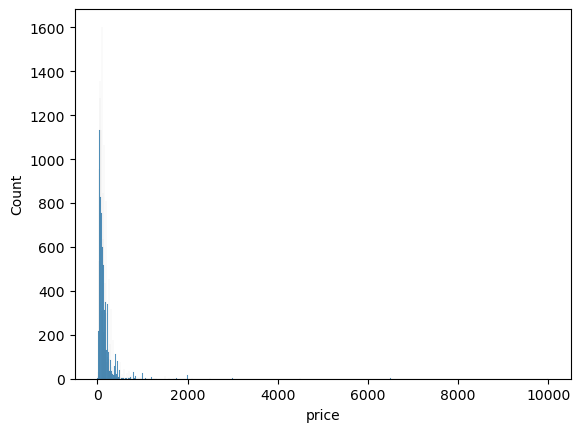

In [11]:
# Price histogram: very long right tail (outliers)
sns.histplot(df['price'])

In [8]:
# Large deviations: 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20000.0,1.892380e+07,1.101223e+07,2539.00000,9.393540e+06,1.952117e+07,2.912936e+07,3.648561e+07
host_id,20000.0,6.746034e+07,7.857936e+07,2571.00000,7.853718e+06,3.111431e+07,1.068426e+08,2.742733e+08
latitude,20000.0,4.072846e+01,5.475508e-02,40.50873,4.068942e+01,4.072273e+01,4.076299e+01,4.091306e+01
longitude,20000.0,-7.395213e+01,4.655878e-02,-74.23914,-7.398303e+01,-7.395564e+01,-7.393638e+01,-7.371795e+01
price,20000.0,1.532690e+02,2.433256e+02,0.00000,6.900000e+01,1.050000e+02,1.750000e+02,1.000000e+04
minimum_nights,20000.0,6.992100e+00,2.164545e+01,1.00000,1.000000e+00,2.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,20000.0,2.327410e+01,4.492779e+01,0.00000,1.000000e+00,5.000000e+00,2.300000e+01,6.070000e+02
reviews_per_month,15877.0,1.377446e+00,1.683006e+00,0.01000,1.900000e-01,7.200000e-01,2.010000e+00,2.795000e+01
calculated_host_listings_count,20000.0,6.955450e+00,3.243383e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,20000.0,1.129012e+02,1.317622e+02,0.00000,0.000000e+00,4.400000e+01,2.290000e+02,3.650000e+02


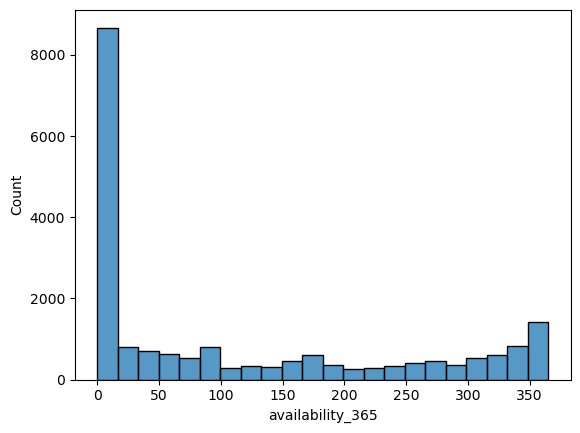

In [9]:
# Price histogram: very long right tail (outliers)
sns.histplot(df['availability_365'])

In [12]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()

In [13]:
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  nu